![title](sier-model.png)

In [4]:
# imports
from cadCAD.configuration import Configuration
from config import *
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
import pandas as pd

exec_mode = ExecutionMode()


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: multi_proc: [<cadCAD.configuration.Configuration object at 0x00000192A4327A48>]
Configurations: [<cadCAD.configuration.Configuration object at 0x00000192A4327A48>]


,susceptible,insusceptible,exposed,infective,quarantined,recovered,death,cure_rate,mortality_rate,run,substep,timestep
0,90000,0,8000,2000,0,0,0,0.1,0.01,1,0,0
1,86400,0,10000,3457,143,0,0,0.1,0.01,1,1,1
2,80426,0,13974,5210,374,14,1,0.1,0.01,1,1,2
3,72046,0,19560,7633,705,51,5,0.1,0.01,1,1,3
4,61047,0,26647,11000,1173,122,12,0.1,0.01,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0,0,2,48,82,90817,9081,0.1,0.01,1,1,116
117,0,0,2,45,76,90825,9082,0.1,0.01,1,1,117
118,0,0,2,42,71,90833,9083,0.1,0.01,1,1,118
119,0,0,2,39,66,90840,9084,0.1,0.01,1,1,119


In [5]:
# Run cadCAD
exec_context = ExecutionContext(exec_mode.multi_proc)
executor = Executor(exec_context, [config]) # Pass the configuration object inside an array
raw_result = executor.execute() # The `execute()` method returns a tuple; its first elements contains the raw results
result = raw_result[0]
raw_result = result[0]
df = pd.DataFrame(raw_result)
df


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: multi_proc: [<cadCAD.configuration.Configuration object at 0x00000192A4327A48>]
Configurations: [<cadCAD.configuration.Configuration object at 0x00000192A4327A48>]


,susceptible,insusceptible,exposed,infective,quarantined,recovered,death,cure_rate,mortality_rate,run,substep,timestep
0,90000,0,8000,2000,0,0,0,0.1,0.01,1,0,0
1,86400,0,10000,3457,143,0,0,0.1,0.01,1,1,1
2,80426,0,13974,5210,374,14,1,0.1,0.01,1,1,2
3,72046,0,19560,7633,705,51,5,0.1,0.01,1,1,3
4,61047,0,26647,11000,1173,122,12,0.1,0.01,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
116,0,0,2,48,82,90817,9081,0.1,0.01,1,1,116
117,0,0,2,45,76,90825,9082,0.1,0.01,1,1,117
118,0,0,2,42,71,90833,9083,0.1,0.01,1,1,118
119,0,0,2,39,66,90840,9084,0.1,0.01,1,1,119


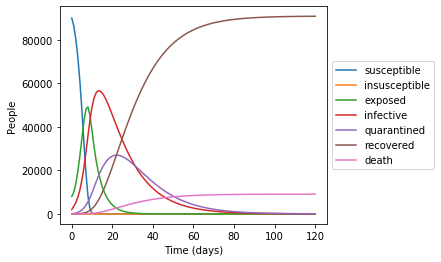

In [2]:
fig, ax = plt.subplots()
ax.plot(df['timestep'], df['susceptible'], label='susceptible'  )
ax.plot(df['timestep'], df['insusceptible'], label='insusceptible'  )
ax.plot(df['timestep'], df['exposed'] , label='exposed'  )
ax.plot(df['timestep'], df['infective'], label='infective'   )
ax.plot(df['timestep'], df['quarantined'], label='quarantined')
ax.plot(df['timestep'], df['recovered'], label='recovered')
ax.plot(df['timestep'], df['death'], label='death' )

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel("Time (days)")
ax.set_ylabel("People")
plt.show()


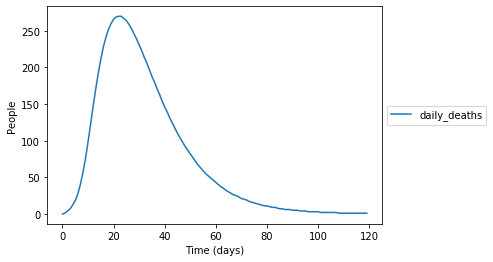

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df['daily_deaths'] =  df['death'].shift(-1) - df['death']
fig, ax = plt.subplots()
ax.plot(df['timestep'], df['daily_deaths'], label='daily_deaths'  )

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel("Time (days)")
ax.set_ylabel("People")
plt.show()
